In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import cv2 as cv
import random
import time
import shutil

from constants import *
from visualisation import *
from character_classes import *
from build_dataset import *
from FacialDetector import *

In [2]:
# print_square_info()
# get_avg_variance()
# build_all_square_positives()

# build_negatives()

In [3]:
#init params

params: Parameters = Parameters()

params.descriptors = 6
params.hog_cell_height = 6
params.hog_cell_width = 6

params.overlap = 0.3

params.number_positive_examples = len(os.listdir(BIG_SET_DIR)) # numarul exemplelor pozitive
params.number_negative_examples = len(os.listdir(NEGATIVE_DIR))  # numarul exemplelor negative

# e foarte mare 4.5
params.threshold = 2 # toate ferestrele cu scorul > threshold si maxime locale devin detectii
params.has_annotations = True

params.use_hard_mining = False  # (optional)antrenare cu exemple puternic negative
params.use_flip_images = True  # adauga imaginile cu fete oglindite

if params.use_flip_images:
    params.number_positive_examples *= 2

facial_detector_6x6: FacialDetector = FacialDetector(params)

directory ../saved_files exists 


In [4]:
# Pasii 1+2+3. Incarcam exemplele pozitive (cropate) si exemple negative generate
# verificam daca sunt deja existente
positive_features_path = os.path.join(params.dir_save_files, 'positive_descriptors_' + 
                        str(params.hog_cell_width) + 'X' + str(params.hog_cell_height) + '_' +
                        str(params.number_positive_examples) + '.npy')

if os.path.exists(positive_features_path):
    positive_features = np.load(positive_features_path)
    print('loaded positive example features')
else:
    print('building positive features')
    positive_features = facial_detector_6x6.get_positive_descriptors()
    np.save(positive_features_path, positive_features)
    print('saved positive descriptors in %s' % positive_features_path)


building positive features
computing descriptors for 5813 positive images...
saved positive descriptors in ../saved_files/positive_descriptors_9X9_11626.npy


In [5]:
# negative examples
negative_features_path = os.path.join(params.dir_save_files, 'negative_descriptors_' + 
                        str(params.hog_cell_width) + 'X' + str(params.hog_cell_height) + '_' + 
                        str(params.number_negative_examples) + '.npy')
if os.path.exists(negative_features_path):
    negative_features = np.load(negative_features_path)
    print('loaded negative example features')
else:
    print('building negative example features')
    negative_features = facial_detector_6x6.get_negative_descriptors()
    np.save(negative_features_path, negative_features)
    print('saved descriptors in %s' % negative_features_path)

building negative example features
computing negative descriptors for 11984 negative images
saved descriptors in ../saved_files/negative_descriptors_9X9_11984.npy


Antrenam un clasificator pentru c=0.000010
0.7622193985599323
Antrenam un clasificator pentru c=0.000100
0.861711139347734
Antrenam un clasificator pentru c=0.001000
0.903981363828886
Antrenam un clasificator pentru c=0.010000
0.9272342227869547
Antrenam un clasificator pentru c=0.100000
0.9334603981363829
Antrenam un clasificator pentru c=1.000000
0.9354510800508259
Performanta clasificatorului optim pt c = 1.000000


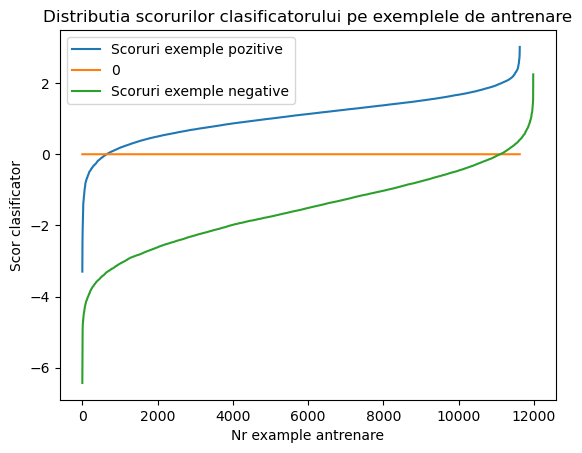

In [6]:
# Pasul 4. Invatam clasificatorul liniar
training_examples = np.concatenate((np.squeeze(positive_features), np.squeeze(negative_features)), axis=0)
train_labels = np.concatenate((np.ones(params.number_positive_examples), np.zeros(negative_features.shape[0])))
facial_detector_6x6.train_classifier(training_examples, train_labels)

Procesam imaginea de testare 0/200..
Timpul de procesarea al imaginii de testare 0/200 este 0.043252 sec.
Procesam imaginea de testare 1/200..
[] []
Timpul de procesarea al imaginii de testare 1/200 este 0.042401 sec.
Procesam imaginea de testare 2/200..
Timpul de procesarea al imaginii de testare 2/200 este 0.039913 sec.
Procesam imaginea de testare 3/200..
[] []
Timpul de procesarea al imaginii de testare 3/200 este 0.042104 sec.
Procesam imaginea de testare 4/200..
Timpul de procesarea al imaginii de testare 4/200 este 0.040635 sec.
Procesam imaginea de testare 5/200..
Timpul de procesarea al imaginii de testare 5/200 este 0.039546 sec.
Procesam imaginea de testare 6/200..
Timpul de procesarea al imaginii de testare 6/200 este 0.040346 sec.
Procesam imaginea de testare 7/200..
[] []
Timpul de procesarea al imaginii de testare 7/200 este 0.040330 sec.
Procesam imaginea de testare 8/200..
Timpul de procesarea al imaginii de testare 8/200 este 0.039918 sec.
Procesam imaginea de testare

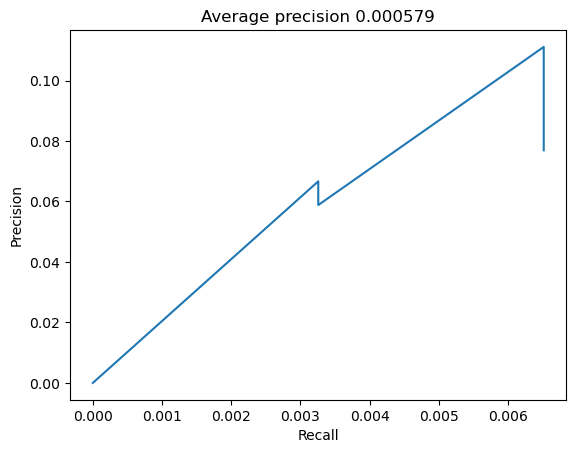

In [7]:

detections, scores, file_names = facial_detector_6x6.run()

# pt vizualizare
if params.has_annotations:
    facial_detector_6x6.eval_detections(detections, scores, file_names)
    show_detections_with_ground_truth(detections, scores, file_names, params)
else:
    show_detections_without_ground_truth(detections, scores, file_names, params)